In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Step 1 Read Data

In [18]:
df = pd.read_csv('superstore.csv', encoding="ISO-8859-1", dtype={'Customer ID': str,'Order ID': str})
df['Order Date'] = pd.to_datetime(df['Order Date'])


In [19]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [20]:
#Forescasting Furniture sales
df = df.loc[df["Category"] == "Technology"]
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
7,8,CA-2014-115812,2014-06-09,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152,6,0.2,90.7152
11,12,CA-2014-115812,2014-06-09,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002033,Technology,Phones,Konftel 250 Conference phone - Charcoal black,911.424,4,0.2,68.3568
19,20,CA-2014-143336,2014-08-27,9/1/2014,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,...,94109,West,TEC-PH-10001949,Technology,Phones,Cisco SPA 501G IP Phone,213.480,3,0.2,16.0110
26,27,CA-2016-121755,2016-01-16,1/20/2016,Second Class,EH-13945,Eric Hoffmann,Consumer,United States,Los Angeles,...,90049,West,TEC-AC-10003027,Technology,Accessories,Imation 8GB Mini TravelDrive USB 2.0 Flash Drive,90.570,3,0.0,11.7741
35,36,CA-2016-117590,2016-12-08,12/10/2016,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,75080,Central,TEC-PH-10004977,Technology,Phones,GE 30524EE4,1097.544,7,0.2,123.4737


In [21]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Quantity', 'Discount', 'Profit']
df.drop(cols, axis=1, inplace=True)
df=df.sort_values('Order Date')
df.isnull().sum() #checking null values
df.head()

,Order Date,Sales
7478,2014-01-06,755.96
7477,2014-01-06,391.98
593,2014-01-09,31.20
765,2014-01-13,646.74
1913,2014-01-15,149.95


In [22]:
df.rename(columns=({'Order Date': 'Date'}),
                inplace=True,)

In [23]:
#Indexing with time series data
df=df.set_index('Date')
df.index

DatetimeIndex(['2014-01-06', '2014-01-06', '2014-01-09', '2014-01-13',
               '2014-01-15', '2014-01-16', '2014-01-20', '2014-01-26',
               '2014-01-26', '2014-02-01',
               ...
               '2017-12-24', '2017-12-24', '2017-12-25', '2017-12-25',
               '2017-12-25', '2017-12-25', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Date', length=1847, freq=None)

## Step 2 : resample

Agregation of data.
Daily > monthly
Monthly > annual

In [41]:
ts=df['Sales'].resample('MS').sum()

In [42]:
ts.head()

Date
2014-01-01     3143.290
2014-02-01     1608.510
2014-03-01    32511.174
2014-04-01     9195.434
2014-05-01     9599.876
Freq: MS, Name: Sales, dtype: float64

<AxesSubplot:xlabel='Date'>

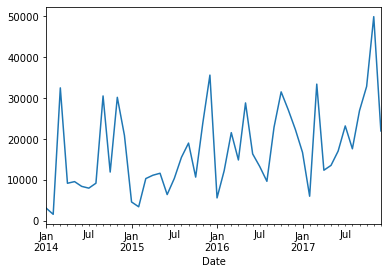

In [43]:
ts.plot()

## Step 3 : Stationary check


In [28]:
import statsmodels.api as sm

<function matplotlib.pyplot.show(close=None, block=None)>

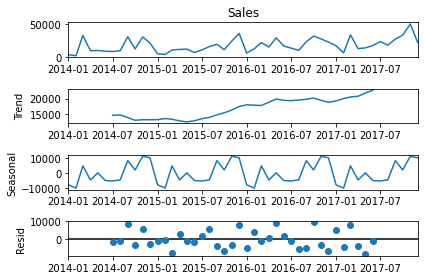

In [29]:
decomposition = sm.tsa.seasonal_decompose(ts, model='additive')
fig = decomposition.plot()
plt.show

In [30]:
from statsmodels.tsa.stattools import adfuller

In [31]:
adftest=adfuller(ts)

In [32]:
print('pvalue adfuller test is: ', adftest[1])

pvalue adfuller test is:  1.861596730206398e-06


## Step 4 : Train test Split

In [33]:
len(ts)

48

In [34]:
train = ts[:38]
test = ts[38:]

## Loop PDQ

In [44]:
import itertools

In [45]:
p=range(0,8)
q=range(0,8)
d=range(0,2)

In [46]:
pdq_combination = list(itertools.product(p,d,q))

In [47]:
len(pdq_combination)

128

In [73]:
rmse=[]
order1=[]

In [74]:
import warnings
warnings.filterwarnings('ignore')

In [75]:
for pdq in pdq_combination:
    try:
        model=ARIMA(train,order=pdq).fit()
        pred=model.predict(start=len(train), end=(len(ts)-1))
        error=np.sqrt(mean_squared_error(test,pred))
        order1.append(pdq)
        rmse.append(error)
        
    except:
        continue

In [77]:
results =pd.DataFrame(index=order1, data=rmse, columns=['RMSE'])

In [78]:
results.to_csv('ARIMA_results.csv')

### ARIMA Model Building :
Arima Model has 3 component
1. AR = p
2. MA. = q
3. Integrated =d

## Step 5 : Hyper Parameter of Arima Model p d q

In [79]:
#p d q
# 5 0 2

## Step 6 : Build Arima model


In [36]:
from statsmodels.tsa.arima_model import ARIMA

In [85]:
model=ARIMA(train,order=(5,0,2)).fit()

### ACF PACF

In [80]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

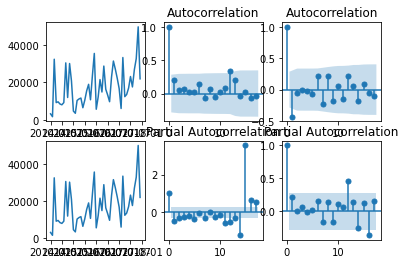

In [84]:
fig,axes=plt.subplots(2,3)
axes[0,0].plot(ts)
plot_acf(ts, ax= axes[0,1])
plot_acf(ts.diff().dropna(),ax= axes[0,2])
axes[1,0].plot(ts)
plot_pacf(ts.diff().dropna(),ax= axes[1,1])
plot_pacf(ts.dropna(),ax= axes[1,2])
plt.show()

## Step 7 : Predict  test dataset

In [93]:
len(train), (len(ts)-1)

(38, 47)

In [94]:
pred=model.predict(start=len(train), end=(len)(ts)-1)

In [95]:
pred.head()

2017-03-01    14476.268202
2017-04-01    19445.705732
2017-05-01    20657.289695
2017-06-01    20061.947483
2017-07-01    14909.299064
Freq: MS, dtype: float64

## Step 8 : Model Evaluation

In [96]:
from sklearn.metrics import mean_squared_error

In [97]:
error=np.sqrt(mean_squared_error(test,pred))
error

13424.156995727364

In [98]:
test.mean(), np.sqrt(test.var())

(24897.073399999997, 11436.131797261636)

<AxesSubplot:xlabel='Date'>

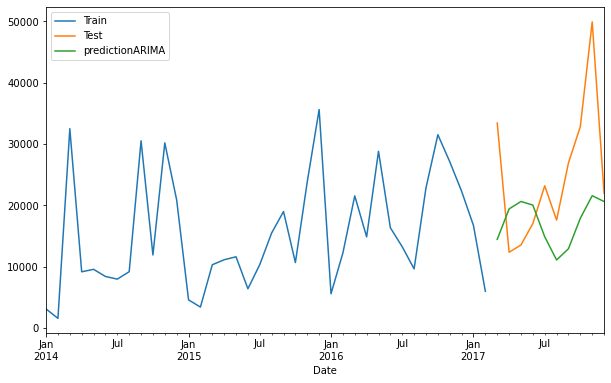

In [99]:
train.plot(legend=True, label='Train', figsize=(10,6))
test.plot(legend=True, label='Test')
pred.plot(legend=True, label='predictionARIMA')

## Step 9 : Predict Future Data

In [103]:
final_model= ARIMA(train,order=(5,0,2)).fit() 

In [105]:
prediction = final_model.predict(len(train), len(train)+6)

<AxesSubplot:xlabel='Date'>

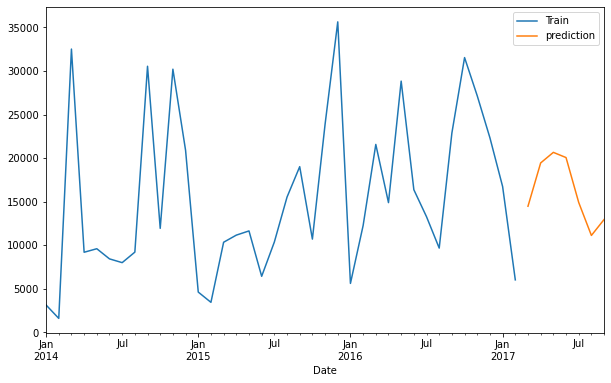

In [106]:
train.plot(legend=True, label='Train', figsize=(10,6))
prediction.plot(legend=True, label='prediction')

### Auto ARIMA

In [107]:
 import pmdarima 

from pmdarima import auto_arima
auto_arima(train, m=12, start_P=0, seasonal=True, d=1, trace=True, error_action='ignore', supprress_warnings=True, stepwise=True)

ModuleNotFoundError: No module named 'pmdarima'